# **Preparation and Imports**

## Mount drive (Google Colab)

In [1]:
from google.colab import drive
drive.mount('/Rock-Paper-Scissors')

Mounted at /Rock-Paper-Scissors


## Setting paths

In [2]:
# Colab paths
# rpspath = './../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/'
# model_path = './../Rock-Paper-Scissors/MyDrive/Models/'

# Local paths
rpspath = './Rock-Paper-Scissors/'
model_path = './Models/'

## Importing packages

In [2]:
!pip install hugsvision


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sn

import tkinter as tk
from tkinter import filedialog

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
#import Tensorflow namespaces

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

import torch
from hugsvision.dataio.VisionDataset import VisionDataset
from sklearn.metrics import confusion_matrix
import os.path
from hugsvision.inference.VisionClassifierInference import VisionClassifierInference
from hugsvision.nnet.VisionClassifierTrainer import VisionClassifierTrainer
from transformers import ViTFeatureExtractor, ViTForImageClassification
from transformers import DeiTFeatureExtractor, DeiTForImageClassification

import pickle

torch.cuda.is_available()

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    print(gpus)
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")


c:\Users\ZeroX\Documents\School\RP\.venv\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Defining train and test data

### Setting paths for train and test directories

In [69]:
train_dir = rpspath + 'train'
print("Train:", os.listdir(train_dir))


test_dir = rpspath + 'test'
print("Test:", os.listdir(test_dir))

validation_dir = rpspath + 'validation'

Train: ['paper', 'rock', 'scissors']
Test: ['paper', 'rock', 'scissors']


### Getting train and test data from directories

In [70]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.2,
    width_shift_range=0.2,
    validation_split=0.1)

test_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(
    directory = train_dir,
    batch_size = 64,
    class_mode = 'categorical',
    target_size = (300,300)
)

test = test_gen.flow_from_directory(
    directory = test_dir,
    batch_size = 64,
    class_mode = 'categorical',
    target_size = (300,300)
)

for data_batch, labels_batch in train:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
data batch shape: (64, 300, 300, 3)
labels batch shape: (64, 3)


# **Training CNN's**

## CNN from scratch

### Creating model and training

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0, clipvalue=0.6)
# early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

model = Sequential([
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3) , activation='relu' , input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5) , activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3) , activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3) , activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy',
            optimizer=opt,
              metrics=['acc'])


history = model.fit(
      train,
      # steps_per_epoch=128,
      epochs=20,
      validation_data=test,
      # validation_steps=128
      )

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/20
40/40 [==============================] - 966s 24s/step - loss: 1.1034 - acc: 0.3714 - val_loss: 0.9946 - val_acc: 0.5081
Epoch 2/20
40/40 [==============================] - 67s 2s/step - loss: 1.0467 - acc: 0.4476 - val_loss: 0.8956 - val_acc: 0.5833
Epoch 3/20
40/40 [==============================] - 63s 2s/step - loss: 0.9092 - acc: 0.5421 - val_loss: 0.9573 - val_acc: 0.3602
Epoch 4/20
40/40 [==============================] - 67s 2s/step - loss: 0.8435 - acc: 0.5964 - val_loss: 0.7123 - val_acc: 0.6183
Epoch 5/20
40/40 [==============================] - 63s 2s/step - loss: 0.7092 - acc: 0.6659 - val_loss: 0.8034 - val_acc: 0.6855
Epoch 6/20
40/40 [==============================] - 63s 2s/step - loss: 0.7277 - acc: 0.6746 - val_loss: 0.5650 - val_acc: 0.7608
Epoch 7/20
40/40 [==============================] - 66s 2s/step - loss: 0.6427 - acc: 0.7083 - val_loss: 0.4160 - val_acc: 0.8495
Epoch 8/20
40/40 [==============================] - 66s 2s/step - loss: 0.7862 - acc: 0.

### Testing model

In [ ]:
from tensorflow.keras.preprocessing import image

def predictor(location):
    test_image=image.load_img(location,target_size=(300,300))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    if result[0][0] == 1:
        prediction = "It is paper"
    elif result[0][1] == 1:
        prediction = "It is rock"
    else:
        prediction ="It is scissors"
    return prediction

path = validation_dir
pathes = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        pathes.append(os.path.join(dirname, filename))
for i in pathes:
    print(i , " :" , predictor(i))

1/1 [==============================] - 0s 19ms/step
./../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/validation/scissors7.png  : It is scissors
1/1 [==============================] - 0s 15ms/step
./../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/validation/scissors6.png  : It is scissors
1/1 [==============================] - 0s 17ms/step
./../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/validation/scissors-hires2.png  : It is scissors
1/1 [==============================] - 0s 19ms/step
./../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/validation/paper4.png  : It is scissors
1/1 [==============================] - 0s 16ms/step
./../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/validation/paper9.png  : It is scissors
1/1 [==============================] - 0s 22ms/step
./../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/validation/scissors3.png  : It is scissors
1/1 [==============================] - 0s 15ms/step
./../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/validat

### Saving model and history

In [ ]:
# saving model
model.save(model_path + 'cnnfromscratch.h5')

# saving model history
with open(model_path + '/CNNFromScratchHistory', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

## CNN Transfer Learning

### Model preparation

#### Model downloading

In [ ]:
modelVGG19 = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(300, 300, 3))
type(modelVGG19)

80134624/80134624 [==============================] - 3s 0us/step


keras.engine.functional.Functional

#### Creating new model from downloaded model

In [ ]:
model = Sequential()

for layer in modelVGG19.layers[:]:
    model.add(layer)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 75, 75, 256)      

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Flatten()) 
model.add(Dense(50,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',optimizer =adam,metrics=['accuracy'])

### Retraining model

In [ ]:
batch_size = 64
epochs = 20
history = model.fit(train, validation_data=test, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
40/40 [==============================] - 85s 2s/step - loss: 1.2136 - accuracy: 0.5940 - val_loss: 0.5083 - val_accuracy: 0.8495
Epoch 2/20
40/40 [==============================] - 70s 2s/step - loss: 0.4422 - accuracy: 0.8813 - val_loss: 0.3962 - val_accuracy: 0.8548
Epoch 3/20
40/40 [==============================] - 67s 2s/step - loss: 0.2742 - accuracy: 0.9353 - val_loss: 0.2406 - val_accuracy: 0.9194
Epoch 4/20
40/40 [==============================] - 67s 2s/step - loss: 0.1889 - accuracy: 0.9571 - val_loss: 0.2835 - val_accuracy: 0.8817
Epoch 5/20
40/40 [==============================] - 67s 2s/step - loss: 0.1434 - accuracy: 0.9679 - val_loss: 0.1836 - val_accuracy: 0.9194
Epoch 6/20
40/40 [==============================] - 70s 2s/step - loss: 0.1272 - accuracy: 0.9667 - val_loss: 0.1846 - val_accuracy: 0.9113
Epoch 7/20
40/40 [==============================] - 70s 2s/step - loss: 0.1182 - accuracy: 0.9690 - val_loss: 0.2106 - val_accuracy: 0.9059
Epoch 8/20
40/40 [==

### Saving model

In [ ]:
# saving model
model.save(model_path + 'cnntransferlearningvgg19.h5')

# saving model history
with open(model_path + '/CNNVGG19History', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

# **Training ViT's**

## ViT (google)

### Loading dataset

In [28]:
train, test, id2label, label2id = VisionDataset.fromImageFolders(
    rpspath + "train/",
    rpspath + "test/",
)

### Model retraining

In [32]:
huggingface_model = 'google/vit-base-patch16-224-in21k'

trainer = VisionClassifierTrainer(
	model_name = "RPViTRPSV1",
	train = train,
	test = test,
	output_dir = model_path + "out/",
	max_epochs = 20,
	batch_size = 32, # On RTX 2080 Ti
	lr = 2e-5,
	fp16 = True,
	model = ViTForImageClassification.from_pretrained(
	    huggingface_model,
	    num_labels = len(label2id),
	    label2id = label2id,
	    id2label = id2label,
		# ignore_mismatched_sizes=True
	),
	feature_extractor = ViTFeatureExtractor.from_pretrained(
		huggingface_model,
	),
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "paper",
    "1": "rock",
    "2": "scissors"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "paper": "0",
    "rock": "1",
    "scissors": "2"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.24.0"
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-

{'0': 'paper', '1': 'rock', '2': 'scissors'}
{'paper': '0', 'rock': '1', 'scissors': '2'}
Trainer builded!
Start Training!


Epoch,Training Loss,Validation Loss
1,No log,0.287802
2,No log,0.211928
3,No log,0.186034
4,No log,0.170640
5,No log,0.163471
6,No log,0.159224
7,0.092500,0.153885
8,0.092500,0.153509
9,0.092500,0.148750
10,0.092500,0.146939


***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evalua

Model saved at: ./../Rock-Paper-Scissors/MyDrive/Models/out/RPVITRPSV1/20_2022-11-06-14-30-14


### Model evaluation

#### F1-score

In [33]:
ref, hyp = trainer.evaluate_f1_score()

100%|██████████| 372/372 [00:08<00:00, 45.98it/s]

              precision    recall  f1-score   support

       paper     1.0000    0.8952    0.9447       124
        rock     0.9051    1.0000    0.9502       124
    scissors     1.0000    1.0000    1.0000       124

    accuracy                         0.9651       372
   macro avg     0.9684    0.9651    0.9650       372
weighted avg     0.9684    0.9651    0.9650       372

Logs saved at: ./../Rock-Paper-Scissors/MyDrive/Models/out/RPVITRPSV1/20_2022-11-06-14-30-14


#### Confusion matrix

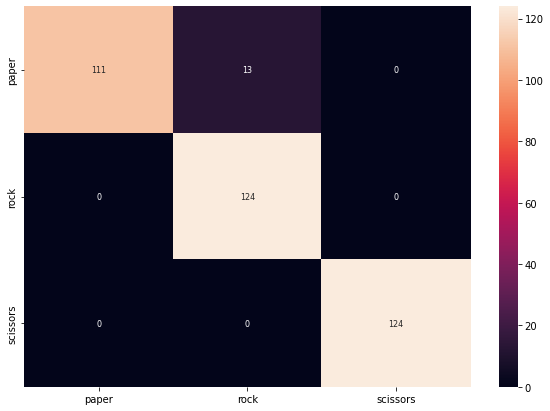

In [35]:
cm = confusion_matrix(ref, hyp)
labels = list(label2id.keys())
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="")
plt.savefig(model_path + "out/RPVITRPSV1/imgs/conf_matrix_1.jpg")

#### Saving evaluation values

In [34]:
with open(model_path + 'out/RPVITRPSV1/eval.pkl', 'wb') as f:
    pickle.dump([ref, hyp], f)

### Model testing

In [ ]:
# model_path = './../Rock-Paper-Scissors/MyDrive/Models/'
# path = model_path + "out/RPViTRPSV1/20_2022-10-28-19-13-13/model/"

# classifier = VisionClassifierInference(
#     feature_extractor = ViTFeatureExtractor.from_pretrained(path),
#     model = ViTForImageClassification.from_pretrained(path),
# )

# img = './../Rock-Paper-Scissors/MyDrive/Rock-Paper-Scissors/validation/paper1.jpg'

# label = classifier.predict(img_path=img)
# print("Predicted class:", label)

# probas = classifier.predict(img_path=img, return_str=False)
# print("Probabilities:", probas)

OSError: ignored

## DeiT (facebook)

### Loading dataset

In [10]:
train, test, id2label, label2id = VisionDataset.fromImageFolders(
    rpspath + "train/",
    rpspath + "test/",
)

### Model retraining

In [16]:
huggingface_model = 'facebook/deit-base-distilled-patch16-224'

trainer = VisionClassifierTrainer(
	model_name = "RPDeiTRPSV1",
	train = train,
	test = test,
	output_dir = model_path + "out/",
	max_epochs = 20,
	batch_size = 32, # On RTX 2080 Ti
	lr = 2e-5,
	fp16 = True,
	model = DeiTForImageClassification.from_pretrained(
	    huggingface_model,
	    num_labels = len(label2id),
	    label2id = label2id,
	    id2label = id2label,
		  ignore_mismatched_sizes=True
	),
	feature_extractor = DeiTFeatureExtractor.from_pretrained(
		huggingface_model,
	),
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--deit-base-distilled-patch16-224/snapshots/a0fc9b37fdb63c112e76104f669208784ecfe4ea/config.json
Model config DeiTConfig {
  "architectures": [
    "DeiTForImageClassificationWithTeacher"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "paper",
    "1": "rock",
    "2": "scissors"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "paper": "0",
    "rock": "1",
    "scissors": "2"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.24.0"
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--facebook--deit-base-distilled-patch16-224/s

{'0': 'paper', '1': 'rock', '2': 'scissors'}
{'paper': '0', 'rock': '1', 'scissors': '2'}
Trainer builded!
Start Training!


Epoch,Training Loss,Validation Loss
1,No log,0.019945
2,No log,0.014739
3,No log,0.014538
4,No log,0.014725
5,No log,0.015189
6,No log,0.015097
7,0.018700,0.015655
8,0.018700,0.015734
9,0.018700,0.015905
10,0.018700,0.015965


***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evaluation *****
  Num examples = 372
  Batch size = 32
***** Running Evalua

Model saved at: ./../Rock-Paper-Scissors/MyDrive/Models/out/RPDEITRPSV1/20_2022-11-06-13-34-33


### Model evaluation

#### F1-score

In [17]:
ref, hyp = trainer.evaluate_f1_score()

100%|██████████| 372/372 [00:08<00:00, 45.39it/s]

              precision    recall  f1-score   support

       paper     1.0000    0.9677    0.9836       124
        rock     0.9688    1.0000    0.9841       124
    scissors     1.0000    1.0000    1.0000       124

    accuracy                         0.9892       372
   macro avg     0.9896    0.9892    0.9892       372
weighted avg     0.9896    0.9892    0.9892       372

Logs saved at: ./../Rock-Paper-Scissors/MyDrive/Models/out/RPDEITRPSV1/20_2022-11-06-13-34-33


#### Saving evaluation values

In [27]:
with open(model_path + '/out/RPDEITRPSV1/eval.pkl', 'wb') as f:
    pickle.dump([ref, hyp], f)

# **Evaluating CNN's**

## Defining train and test data

### Setting paths for train and test directories

In [29]:
train_dir = rpspath + 'train'
print("Train:", os.listdir(train_dir))


test_dir = rpspath + 'test'
print("Test:", os.listdir(test_dir))

validation_dir = rpspath + 'validation'

Train: ['paper', 'rock', 'scissors']
Test: ['paper', 'rock', 'scissors']


### Getting train and test data from directories

In [31]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.2,
    width_shift_range=0.2,
    validation_split=0.1)

test_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(
    directory = train_dir,
    batch_size = 64,
    class_mode = 'categorical',
    target_size = (300,300)
)

test = test_gen.flow_from_directory(
    directory = test_dir,
    batch_size = 64,
    class_mode = 'categorical',
    target_size = (300,300)
)

for data_batch, labels_batch in train:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
data batch shape: (64, 300, 300, 3)
labels batch shape: (64, 3)


## CNN from scratch

### Loading model and history

In [40]:
model = keras.models.load_model(model_path + 'cnnfromscratch.h5')

with open(model_path + '/CNNFromScratchHistory', "rb") as file_pi:
    history = pickle.load(file_pi)

### Training history

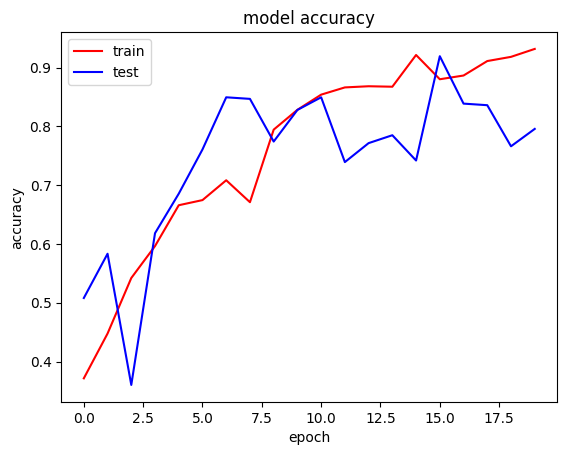

In [41]:
# Plot of the training history

# Accuray 
plt.plot(history['acc'],'r')
plt.plot(history['val_acc'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(model_path + "/imgs/hist1_CNN1.jpg")

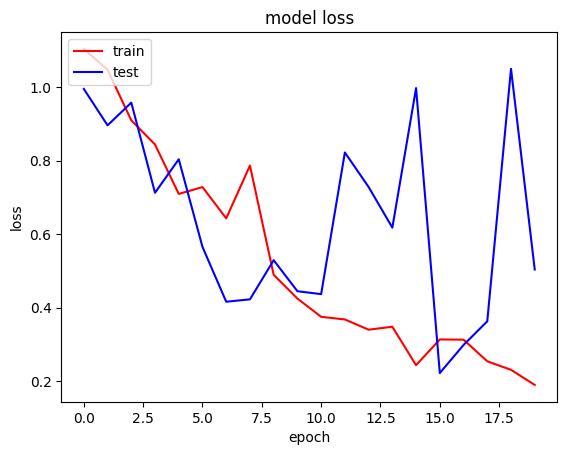

In [42]:
# Loss 
plt.plot(history['loss'],'r')
plt.plot(history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(model_path + "/imgs/hist2_CNN1.jpg")

### Testing + confusion matrix

In [43]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred,axis=1)
print('\n')
print(classification_report(test.labels, y_pred))

6/6 [==============================] - 1s 217ms/step


              precision    recall  f1-score   support

           0       0.41      0.23      0.30       124
           1       0.35      0.44      0.39       124
           2       0.32      0.37      0.34       124

    accuracy                           0.35       372
   macro avg       0.36      0.35      0.34       372
weighted avg       0.36      0.35      0.34       372



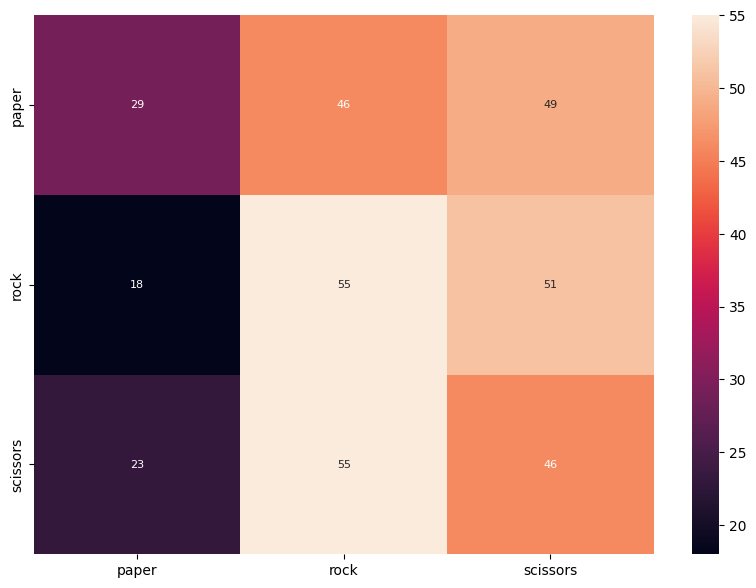

In [45]:
cm = confusion_matrix(test.labels, y_pred)
labels = list(label2id.keys())
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="")
plt.savefig(model_path + "/imgs/conf_matrix_CNN1.jpg")

## CNN Transfer Learning

### Loading model and history

In [32]:
model = keras.models.load_model(model_path + 'cnntransferlearningvgg19.h5')

with open(model_path + '/CNNVGG19History', "rb") as file_pi:
    history = pickle.load(file_pi)

### Training history

In [33]:
print(history)

{'loss': [1.213607668876648, 0.4422090947628021, 0.27424928545951843, 0.18885953724384308, 0.1433839648962021, 0.12722517549991608, 0.11820884793996811, 0.08109620958566666, 0.06899621337652206, 0.06424686312675476, 0.05328097939491272, 0.05266407132148743, 0.04459492117166519, 0.04429268464446068, 0.044663771986961365, 0.04224168881773949, 0.035280220210552216, 0.03148617967963219, 0.034232474863529205, 0.02766827866435051], 'accuracy': [0.5940476059913635, 0.8813492059707642, 0.9353174567222595, 0.9571428298950195, 0.9678571224212646, 0.9666666388511658, 0.9690476059913635, 0.9821428656578064, 0.9865079522132874, 0.9876984357833862, 0.9904761910438538, 0.9888888597488403, 0.9916666746139526, 0.9904761910438538, 0.9884920716285706, 0.9896825551986694, 0.9896825551986694, 0.9932539463043213, 0.9928571581840515, 0.9928571581840515], 'val_loss': [0.5082619786262512, 0.3962216079235077, 0.24057486653327942, 0.28354203701019287, 0.18364083766937256, 0.18458682298660278, 0.2105940580368042,

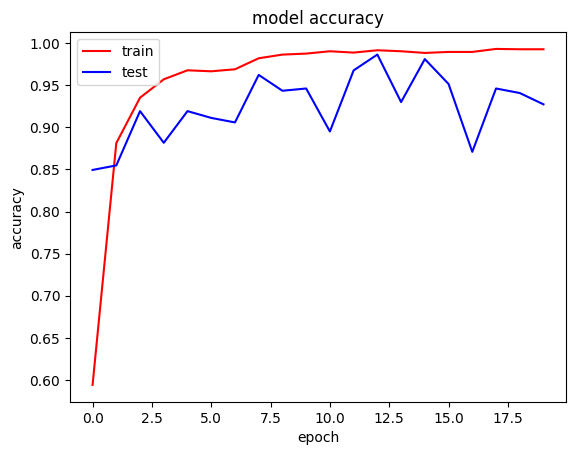

In [34]:
# Plot of the training history

# Accuray 
plt.plot(history['accuracy'],'r')
plt.plot(history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(model_path + "/imgs/hist1_CNN2.jpg")

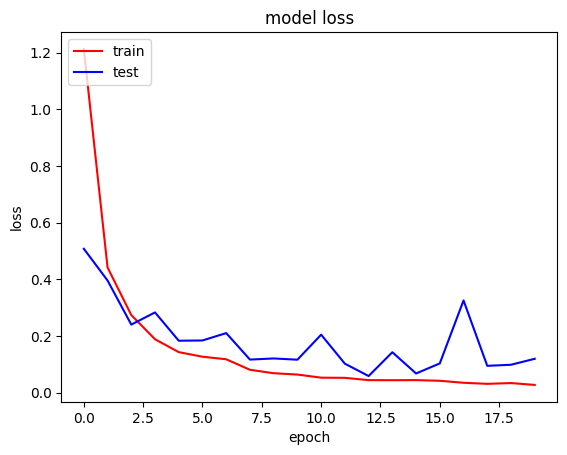

In [35]:
# Loss 
plt.plot(history['loss'],'r')
plt.plot(history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(model_path + "/imgs/hist2_CNN2.jpg")

### Testing + confiusion matrix

In [36]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred,axis=1)
print('\n')
print(classification_report(test.labels, y_pred))

cf = confusion_matrix(test.labels, y_pred)

print(cf)
print(accuracy_score(test.labels, y_pred) * 100) 

6/6 [==============================] - 3s 576ms/step


              precision    recall  f1-score   support

           0       0.30      0.23      0.26       124
           1       0.39      0.46      0.42       124
           2       0.38      0.40      0.39       124

    accuracy                           0.36       372
   macro avg       0.36      0.36      0.36       372
weighted avg       0.36      0.36      0.36       372

[[29 45 50]
 [37 57 30]
 [31 44 49]]
36.29032258064516


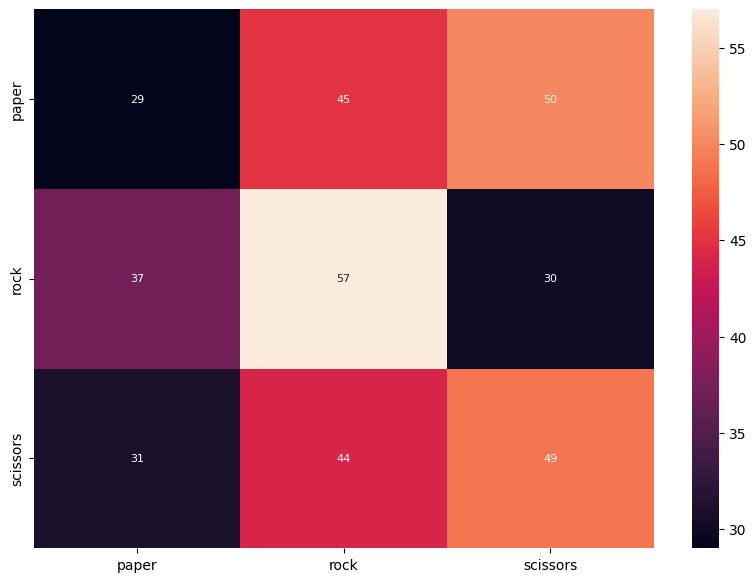

In [39]:
cm = confusion_matrix(test.labels, y_pred)
labels = list(label2id.keys())
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="")
plt.savefig(model_path + "imgs/conf_matrix_CNN2.jpg")

# **Evaluating ViT's**

### Loading dataset

In [46]:
train, test, id2label, label2id = VisionDataset.fromImageFolders(
    rpspath + "train/",
    rpspath + "test/",
)

## ViT (google)

### Loading evaluation values

In [47]:
path = model_path + '/out/RPVITRPSV1/eval.pkl'

with open(model_path + '/out/RPVITRPSV1/eval.pkl', 'rb') as f:
    ref, hyp = pickle.load(f)

### Confusion matrix

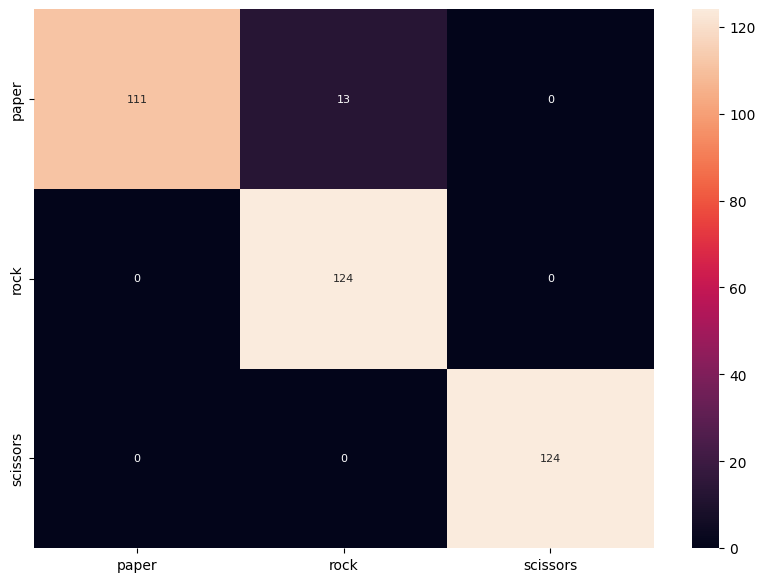

In [49]:
cm = confusion_matrix(ref, hyp)
labels = list(label2id.keys())
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="")
plt.savefig(model_path + "imgs/conf_matrix_ViT.jpg")

In [53]:
f = open(model_path + 'out/RPVITRPSV1/20_2022-11-06-14-30-14/logs.txt', 'r')
file_contents = f.read()

print(file_contents)

              precision    recall  f1-score   support

       paper     1.0000    0.8952    0.9447       124
        rock     0.9051    1.0000    0.9502       124
    scissors     1.0000    1.0000    1.0000       124

    accuracy                         0.9651       372
   macro avg     0.9684    0.9651    0.9650       372
weighted avg     0.9684    0.9651    0.9650       372




## DeiT (facebook)

### Loading evaluation values

In [50]:
path = model_path + '/out/RPDEITRPSV1/eval.pkl'

with open(model_path + '/out/RPDEITRPSV1/eval.pkl', 'rb') as f:
    ref, hyp = pickle.load(f)

### Evaluating model

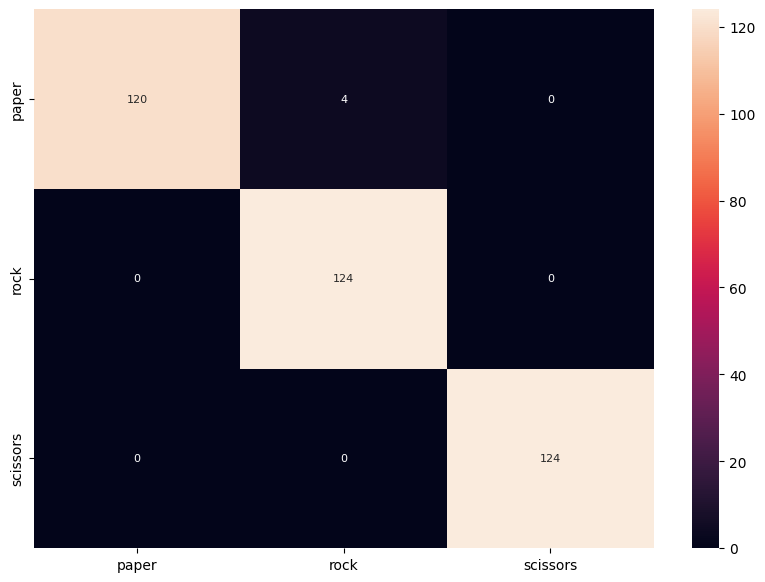

In [52]:
cm = confusion_matrix(ref, hyp)
labels = list(label2id.keys())
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="")
plt.savefig(model_path + "out/RPDEITRPSV1/imgs/conf_matrix_1.jpg")

In [54]:
f = open(model_path + 'out/RPDEITRPSV1/20_2022-11-06-13-34-33/logs.txt', 'r')
file_contents = f.read()

print(file_contents)

              precision    recall  f1-score   support

       paper     1.0000    0.9677    0.9836       124
        rock     0.9688    1.0000    0.9841       124
    scissors     1.0000    1.0000    1.0000       124

    accuracy                         0.9892       372
   macro avg     0.9896    0.9892    0.9892       372
weighted avg     0.9896    0.9892    0.9892       372




# Testing

In [4]:
import PIL

def predictor(model, location):
    test_image=image.load_img(location,target_size=(300,300))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    probas = (result > 0.5).astype("int32")
    if result[0][0] == 1:
        prediction = "paper"
    elif result[0][1] == 1:
        prediction = "rock"
    else:
        prediction ="scissors"
    return prediction, probas

In [5]:
cnn_self = keras.models.load_model(model_path + 'cnnfromscratch.h5')

cnn_transfer = keras.models.load_model(model_path + 'cnntransferlearningvgg19.h5')

path = model_path + 'out/RPVITRPSV1/20_2022-11-06-14-30-14/model'
classifier_vit = VisionClassifierInference(
    feature_extractor = ViTFeatureExtractor.from_pretrained(path),
    model = ViTForImageClassification.from_pretrained(path),
)

path = model_path + 'out/RPDEITRPSV1/20_2022-11-06-13-34-33/model'
classifier_deit = VisionClassifierInference(
    feature_extractor = DeiTFeatureExtractor.from_pretrained(path),
    model = DeiTForImageClassification.from_pretrained(path),
)

root = tk.Tk()
root.withdraw()

img = filedialog.askopenfilename()
result1, probas1 = predictor(cnn_self, img)
result2, probas2 = predictor(cnn_transfer, img)

if (img.lower().endswith(('.jpg', '.jpeg'))) :
    print("Predicted class by selfmade CNN:", result1)
    print(probas1)

    print("Predicted class by VGG19 CNN:", result2)
    print(probas2)

    label = classifier_vit.predict(img_path=img)
    print("Predicted class by ViT:", label)
    
    probas = classifier_vit.predict(img_path=img, return_str=False)
    print(probas)

    label = classifier_deit.predict(img_path=img)
    print("Predicted class by DeiT:", label)

    probas = classifier_deit.predict(img_path=img, return_str=False)
    print(probas)
else :
    print("Please choose a .jpg file.")

Model loaded!
Model loaded!
1/1 [==============================] - 1s 644ms/step
Predicted class by selfmade CNN: paper
[[1 0 0]]
Predicted class by VGG19 CNN: paper
[[1 0 0]]
Predicted class by ViT: paper
{'paper': 98.45909118652344, 'rock': 0.8142744898796082, 'scissors': 0.726641833782196}
Predicted class by DeiT: paper
{'paper': 99.81134796142578, 'rock': 0.12760581076145172, 'scissors': 0.06104327738285065}
